In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [28]:
# Data inlezen uit csv. Data types (dtypes) voor de kolommen gespecificeerd ivm low memory error
tab = pd.read_csv('SterrenCoordinatenVolledig.csv',
                  sep = ',',
                  dtype = {'pl_name' : 'string',
                           'hostname' : 'string',
                           'ra' : 'float',
                           'dec' : 'float',
                           'sy_dist' : 'float',
                           'sy_snum' : 'int',
                           'sy_pnum' : 'int',
                           'st_spectype' : 'string',
                           'st_teff' : 'float',
                           'st_rad' : 'float',
                           'st_mass' : 'float',
                           'rastr' : 'string',
                           'decstr' : 'string'
                          },
                 header = 19)

In [29]:
# Data opschonen
tab.drop(['rastr', 'decstr'], axis=1, inplace=True)     # Drop kolommen met declination en right ascencion in uren/minuten notatie
tab.dropna(inplace=True)                                # Drop alle rijen met missing values
tab.drop_duplicates(subset=['hostname'], inplace=True)  # Drop de rijen met duplicate sterren (rijen specificeren de planeten, niet de sterren)
tab.reset_index(inplace=True, drop=True)

# Kolommen andere naam geven
tab.rename(columns={'pl_name'     : 'planet_name',
                    'hostname'    : 'starname',
                    'ra'          : 'right_ascencion',
                    'dec'         : 'declination',
                    'sy_dist'     : 'distance',
                    'sy_snum'     : 'number_stars',
                    'sy_pnum'     : 'number_planets',
                    'st_spectype' : 'spectral_type',
                    'st_teff'     : 'star_temp',
                    'st_rad'      : 'star_radius',
                    'st_mass'     : 'star_mass'},
           inplace=True)

In [30]:
tab

,planet_name,starname,number_stars,number_planets,spectral_type,star_temp,star_radius,star_mass,right_ascencion,declination,distance
0,11 Com b,11 Com,2,1,G8 III,4742.0,19.00,2.70,185.178779,17.793252,93.1846
1,11 UMi b,11 UMi,1,1,K4 III,4340.0,24.08,1.80,229.274595,71.823943,125.3210
2,14 And b,14 And,1,1,K0 III,4813.0,11.00,2.20,352.824150,39.235837,75.4392
3,18 Del b,18 Del,2,1,G6 III,4979.0,8.50,2.30,314.607838,10.839138,76.2220
4,1RXS J160929.1-210524 b,1RXS J160929.1-210524,1,1,K7 V,4060.0,1.35,0.85,242.376234,-21.083140,139.1350
...,...,...,...,...,...,...,...,...,...,...,...
742,nu Oph b,nu Oph,1,2,K0 III,4886.0,14.60,2.70,269.756601,-9.774134,46.2107
743,ome Ser b,ome Ser,2,1,G8 III,4770.0,12.30,2.17,237.573242,2.196304,76.7556
744,rho CrB b,rho CrB,1,2,G0 V,5627.0,1.36,0.89,240.260064,33.300186,17.4671
745,tau Gem b,tau Gem,1,1,K2 III,4388.0,26.80,2.30,107.784723,30.244954,112.5370


In [21]:
# Hoeken van right ascencion en declination omrekenen naar radians
tab['alpha'] = tab['right_ascencion'].apply(math.radians)
tab['delta'] = tab['declination'].apply(math.radians)

In [22]:
# X, Y en Z coördinaten berekenen
tab['X'] = tab['delta'].apply(math.cos) * tab['alpha'].apply(math.cos) * tab['distance']
tab['Y'] = tab['delta'].apply(math.cos) * tab['alpha'].apply(math.sin) * tab['distance']
tab['Z'] = tab['delta'].apply(math.sin) * tab['distance']

In [23]:
tab.to_csv('sterren_zonder_na.csv')

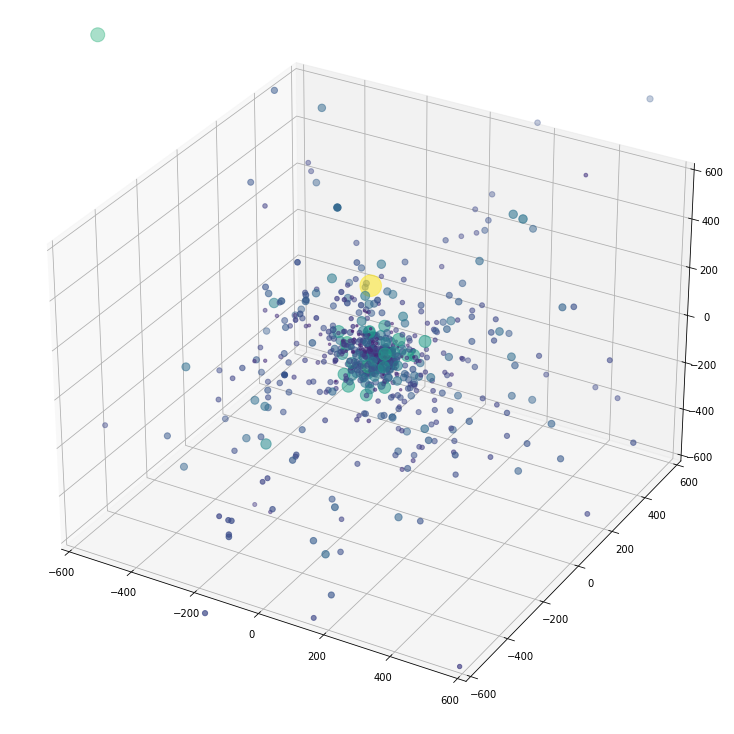

In [12]:
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig, auto_add_to_figure=False)

lim = (-600, 600)
ax.set_xlim3d(lim)
ax.set_ylim3d(lim)
ax.set_zlim3d(lim)
fig.add_axes(ax)
ax.scatter(tab.X, tab.Y, tab.Z, c=tab.star_mass, s=(tab.star_mass * 5) ** 2)


(-600.0, 600.0)

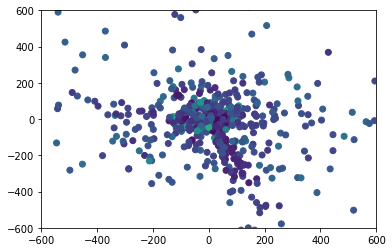

In [14]:
lim = (-600, 600)

plt.scatter(tab.X, tab.Y, c=tab.star_mass)
plt.xlim(lim)
plt.ylim(lim)

In [ ]:
plt.violinplot([tab.X, tab.Y, tab.Z])

{'bodies': [<matplotlib.collections.PolyCollection at 0x21d1b3c25b0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x21d1b39a2e0>,
 'cmins': <matplotlib.collections.LineCollection at 0x21d1b3c2b20>,
 'cbars': <matplotlib.collections.LineCollection at 0x21d1b3c2e50>}

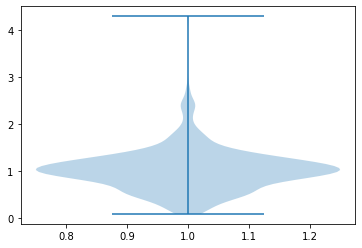

In [35]:
plt.violinplot(tab.star_mass)

In [32]:
tab.describe()

,number_stars,number_planets,star_temp,star_radius,star_mass,right_ascencion,declination,distance,alpha,delta,X,Y,Z
count,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,1.200803,1.385542,5231.661178,2.743614,1.025167,191.400888,2.278489,258.747748,3.340576,0.039767,19.467600,-37.431764,29.094428
std,0.460038,0.827610,1316.607434,6.843837,0.448279,106.358861,38.874852,304.871247,1.856312,0.678494,187.441255,272.255457,219.315368
min,1.000000,1.000000,2904.000000,0.110000,0.090000,0.185606,-88.121111,1.301190,0.003239,-1.538004,-1303.381967,-1727.537805,-938.026402
25%,1.000000,1.000000,4545.000000,0.740000,0.770000,97.708228,-26.412422,58.172650,1.705330,-0.460984,-37.784805,-86.292960,-46.298788
50%,1.000000,1.000000,5404.000000,1.080000,1.010000,195.443850,2.335027,148.187000,3.411139,0.040754,7.978051,-3.464512,2.776646
75%,1.000000,1.000000,5917.500000,1.590000,1.220000,288.375182,36.599403,337.326500,5.033096,0.638780,84.791705,37.851864,74.645784
max,4.000000,6.000000,27730.000000,83.800000,4.300000,359.974984,85.736533,2346.010000,6.282749,1.496385,1110.425986,1992.714263,1700.152907


In [ ]:
ax1 = plt.
ax2 = plt
ax3 = plt
fig = plt.figure(3,1)
fig.add_axes([ax1, ax2, ax3])

(array([  1.,   1.,   3.,   8.,  25.,  43., 185., 339.,  78.,  20.,  16.,
          7.,   9.,   9.,   0.,   1.,   0.,   1.,   0.,   1.]),
 array([-938.02640217, -806.11743668, -674.2084712 , -542.29950572,
        -410.39054023, -278.48157475, -146.57260927,  -14.66364379,
         117.2453217 ,  249.15428718,  381.06325266,  512.97221814,
         644.88118363,  776.79014911,  908.69911459, 1040.60808007,
        1172.51704556, 1304.42601104, 1436.33497652, 1568.243942  ,
        1700.15290749]),
 <BarContainer object of 20 artists>)

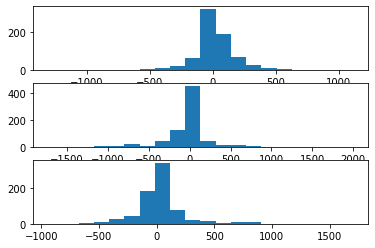

In [30]:
fig, axs = plt.subplots(3)
axs[0].hist(tab.X, bins=20)
axs[1].hist(tab.Y, bins=20)
axs[2].hist(tab.Z, bins=20)
